In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
#data import
data = pd.read_csv('emails.csv')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [129]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [130]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


<Axes: xlabel='spam', ylabel='count'>

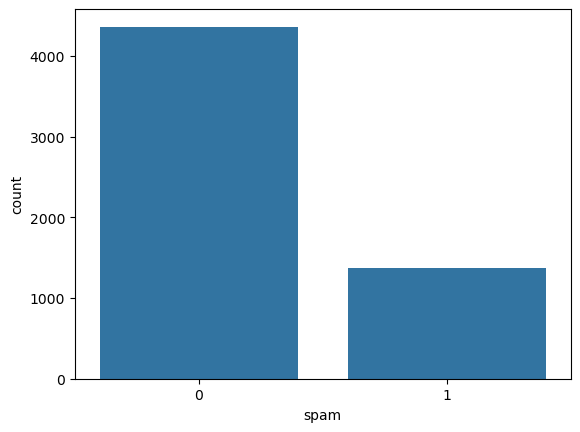

In [131]:
sns.countplot(x = 'spam', data=data)

In [132]:
data.duplicated().sum()

33

In [133]:
data.drop_duplicates(inplace=True)

In [134]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [135]:
data.shape

(5695, 2)

In [136]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

# Separate in X and Y

In [137]:
x = data['text'].values
y = data['spam'].values

In [138]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [139]:
x

array(["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : y

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [142]:
x_train.shape

(4556,)

In [143]:
x_test.shape

(1139,)

# preprocessing

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

In [145]:
from sklearn.pipeline import make_pipeline

In [146]:
from sklearn.naive_bayes import MultinomialNB

In [147]:
cv = CountVectorizer()

In [148]:
nb = MultinomialNB()

In [149]:
pipe = make_pipeline(cv, nb)

In [150]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [151]:
y_pred1 = pipe.predict(x_test)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.990342405618964

In [154]:
email = ['Hey I am Elon Musk, Get a brand new car from Tesla']
pipe.predict(email)

array([1], dtype=int64)

In [155]:
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))

In [111]:
x_train = cv.fit_transform(x_train)

In [112]:
x_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
len(x_train.toarray())

4556

# Train by ML algorithm

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
nb = MultinomialNB()

In [116]:
nb.fit(x_train, y_train)

MultinomialNB()

In [117]:
x_test = cv.transform(x_test)

In [118]:
y_pred = nb.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
acc1 = accuracy_score(y_test, y_pred)

In [121]:
print(acc1)

0.990342405618964


In [122]:
email = ['Hey, I am looking for a machine learning course. Can you please help me with that?']
clearn_email = cv.transform(email)

In [123]:
nb.predict(clearn_email)

array([0], dtype=int64)

In [124]:
email = ['Hey i am Elon musk. Get a brand new car from Tesla']
clearn_email = cv.transform(email)
predict = nb.predict(clearn_email)[0]

if predict==0:
    print('Not a spam')
else:
    print('Spam')

Spam
